# Data Mining Assignment

## Video Presentation

<iframe width="560" height="315" src="https://www.youtube.com/embed/VvnZifihKBY?si=eCVnIQ4u0AcP3y0d" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

# Logistic Regression - Cardiovascular disease

## Business Understanding 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31 % of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. 

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. (Fedesoriano, 2021) 

The goal of the project was to create a model that predicts the probability of having a heart disease based on risk factors and other characteristics of a patient using Logistic Regression, so earlier care could be provided to the patients.

The project would be a success if the accuracy of the model was greater than 85%.

The model would have to be deployed after ensuring alignment to the EU AI Act standards since machine learning in healthcare is considered to be high risk (European Commission, 2025).

The model is also relatively simple and may not understand the complexities of different health conditions. 

 

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df= pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Understanding

To solve this problem, we chose a dataset from Kaggle: 
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

The dataset contains 12 columns – 5 categorical attributes and 7 numerical. The target variable is a binary feature “Heart Disease”, where 1 means heart disease, 0 means healthy. 

This is the description of predictor variables (Fedesoriano, 2021): 

Age: age of the patient [years] 

Sex: sex of the patient [M: Male, F: Female] 

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]4. 

RestingBP: resting blood pressure [mm Hg] 

Cholesterol: serum cholesterol [mm/dl] 

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]; chest pain or discomfort that happens during physical activity 

Oldpeak: oldpeak = ST [Numeric value measured in depression], is used to assess how well the heart handles stress 

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping – generally considered normal and less concerning, Flat: flat – potential of heart disease, Down: downsloping – sign of serious heart problems] 

Initial exploration revealed that:
The distribution of target variable is even, meaning that it does not negatively affect the model’s performance. 

There were moderately strong correlations between Oldpeak, MaxHR and Heart Disease

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


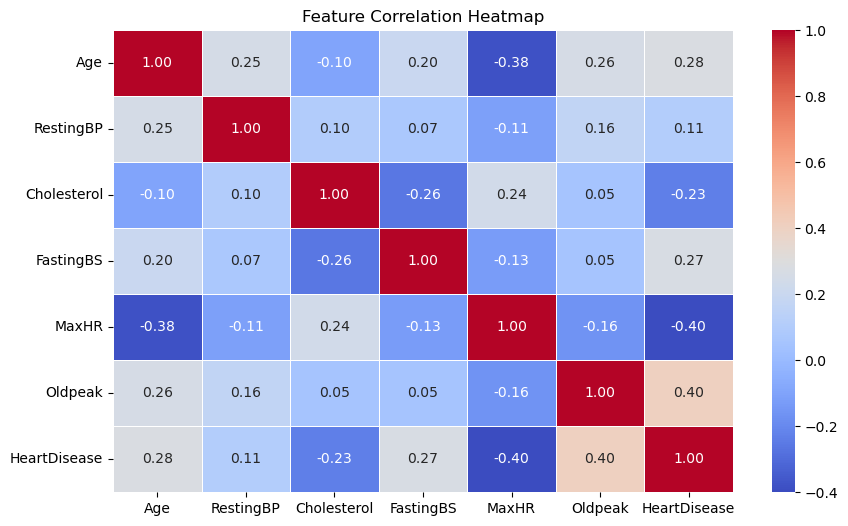

In [3]:
df_num = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
 
plt.figure(figsize=(10, 6))
sn.heatmap(df_num.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
# Checking for missing values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
# Target variable distribution
count_disease = df["HeartDisease"].value_counts() # counts the distribution of both values
prop_disease = df["HeartDisease"].value_counts(normalize=True) # normalized (0-1)
print(count_disease)
print(prop_disease)

HeartDisease
1    508
0    410
Name: count, dtype: int64
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


## Data Preparation
We found out that there are not any missing values in the dataset. 

We began by normalizing the data to scale it, so the model works properly and doesn’t skew the results.  

We converted the string data into integer using pd.get_dummies to make the dataframe ready for the model.  

We checked for multicollinearity between the predictor variables that would possibly cause unstable estimates of coefficients and reduction of predictive power (Bobbitt, 2019). This analysis revealed that “Up” and “Flat” categories of ST_Slope were highly correlated. After creating a countplot of ST_Slope feature, we found that the “Down” category was underrepresented in the dataset. To address this imbalance, we merged the “Flat” and “Down” columns into a single group (as the opposite of “Up”). Then, we dropped the “Up” column to use it as a reference category.     

The updated variance inflation factors (VIF) did not show any cases of high multicollinearity. 

Then, we created training and testing data to help train the model. We used 70% of the data to train and 30% to test the model. 


In [6]:
import numpy as np

def normalize(x):                               # Creating a function
    return (x - min(x)) / (max(x) - min(x))     # distance of (item value - minimum vector value) divided by the range of all vector values


testSet1 = np.arange(1, 6)                      # Using numpy to set a test range
testSet2 = np.arange(1, 6) * 10


print(f"testSet1: {testSet1}\n")                #Printing Test set 
print(f"testSet2: {testSet2}\n")

print(f"Normalized testSet1: {normalize(testSet1)}\n")           #Printing normalized test set
print(f"Normalized testSet2: {normalize(testSet2)}\n")   


# So, the function works.

testSet1: [1 2 3 4 5]

testSet2: [10 20 30 40 50]

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]

Normalized testSet2: [0.   0.25 0.5  0.75 1.  ]



In [7]:
df1 = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], 
                    drop_first=True, dtype=int)

# Checking for multicollinearity 
#VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #import the VIF function 
from statsmodels.tools.tools import add_constant #import the add_constant function 


X = df1.drop("HeartDisease", axis=1).dropna()  
X = add_constant(X)  

#Create a dataframe that contains the VIF values 
VIF_data = pd.DataFrame() #create a pandas dataframe 
VIF_data["variable"] = X.columns #create a variable that simply lists the names of the variables you picked 
VIF_data["VIF"] = [vif(X,i)  
                   for i in range(len(X.columns))] #a loop that creates vif values for each variable and then puts it in the VIF column 

print(VIF_data) #print the results 


             variable         VIF
0               const  190.192247
1                 Age    1.395579
2           RestingBP    1.124341
3         Cholesterol    1.235444
4           FastingBS    1.147103
5               MaxHR    1.556617
6             Oldpeak    1.534675
7               Sex_M    1.105078
8   ChestPainType_ATA    1.505606
9   ChestPainType_NAP    1.263967
10   ChestPainType_TA    1.120390
11  RestingECG_Normal    1.741934
12      RestingECG_ST    1.704894
13   ExerciseAngina_Y    1.583291
14      ST_Slope_Flat    4.513918
15        ST_Slope_Up    5.523789


We noticed multicollinearity due to fewer instances of ST_Slope_Down

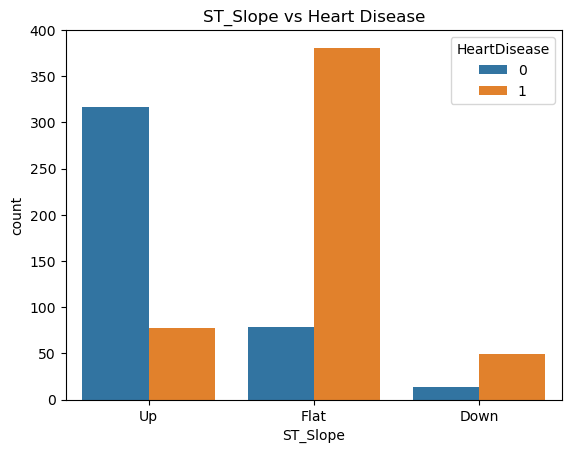

In [8]:
sn.countplot(x=df['ST_Slope'],hue=df['HeartDisease'])
plt.title("ST_Slope vs Heart Disease")
plt.show()

In [9]:
ST_Slope_Dummies= pd.get_dummies(df['ST_Slope'], dtype=int)
print(ST_Slope_Dummies)
ST_Slope_Dummies= ST_Slope_Dummies.drop(["Down","Flat"], axis=1)
ST_Slope_Dummies['ST_Slope_D+F']= 1 - ST_Slope_Dummies['Up']
ST_Slope_Dummies = ST_Slope_Dummies.drop('Up', axis=1)
print(ST_Slope_Dummies)
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina'], 
                    drop_first=True, dtype=int)
df = pd.concat([ST_Slope_Dummies, df],axis=1).drop("ST_Slope",axis=1)
print(df.head())



     Down  Flat  Up
0       0     0   1
1       0     1   0
2       0     0   1
3       0     1   0
4       0     0   1
..    ...   ...  ..
913     0     1   0
914     0     1   0
915     0     1   0
916     0     1   0
917     0     0   1

[918 rows x 3 columns]
     ST_Slope_D+F
0               0
1               1
2               0
3               1
4               0
..            ...
913             1
914             1
915             1
916             1
917             0

[918 rows x 1 columns]
   ST_Slope_D+F  Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0             0   40        140          289          0    172      0.0   
1             1   49        160          180          0    156      1.0   
2             0   37        130          283          0     98      0.0   
3             1   48        138          214          0    108      1.5   
4             0   54        150          195          0    122      0.0   

   HeartDisease  Sex_M  ChestPainType_ATA  Ch

In [10]:
# Checking for multicollinearity 
#VIF 
X = df.drop("HeartDisease", axis=1).dropna()  
X = add_constant(X)  

#Create a dataframe that contains the VIF values 
VIF_data = pd.DataFrame() #create a pandas dataframe 
VIF_data["variable"] = X.columns #create a variable that simply lists the names of the variables you picked 
VIF_data["VIF"] = [vif(X,i)  
                   for i in range(len(X.columns))] #a loop that creates vif values for each variable and then puts it in the VIF column 

print(VIF_data) #print the results 


             variable         VIF
0               const  180.970509
1        ST_Slope_D+F    1.606767
2                 Age    1.391983
3           RestingBP    1.118713
4         Cholesterol    1.228550
5           FastingBS    1.143646
6               MaxHR    1.554806
7             Oldpeak    1.439361
8               Sex_M    1.104936
9   ChestPainType_ATA    1.503961
10  ChestPainType_NAP    1.263961
11   ChestPainType_TA    1.120351
12  RestingECG_Normal    1.741013
13      RestingECG_ST    1.704478
14   ExerciseAngina_Y    1.582994


## Modelling and Evaluation
Logistic regression is designed specifically for binary classification problems.
The output is a probability between 0 and 1, making it easy to classify patients as "at risk" (1) or "not at risk" (0) and this is why we chose it.

We created the model and fitted the necessary training data. We did not specify any hyperparameters, so the model used default values. 

We created a new variable to store the predictions of the model. 

We evaluated the accuracy of the model using different metrics such as the accuracy score, confusion matrix and classification report. 

#### Performance on Class 0 (No Heart Disease):

Precision (0.83): When the model predicts "No Heart Disease," it is correct 83% of the time.

Recall (0.88): Out of all actual "No Heart Disease" cases, the model correctly identifies 88%.

#### Performance on Class 1 (Heart Disease):

Precision (0.91): When the model predicts "Heart Disease," it is correct 91% of the time.

Recall (0.88): Out of all actual "Heart Disease" cases, the model correctly identifies 88%.


We were able to achieve an accuracy of 88% which is 33% better than the baseline (since it would predict the class which is in majority and be accurate 55% of the time)

Balanced Performance for Both Classes:

Since the class distribution is balanced, the performance metrics and the model are not heavily biased toward either class.

 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assume A contains your predictors and B contains your binary target variable
A = df.drop("HeartDisease", axis=1)
A = A.apply(normalize, axis=0)
B = df['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8768115942028986
Confusion Matrix:
 [[ 98  14]
 [ 20 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.91      0.88      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



## Interpretation

We printed the coefficients and odds ratios for easy interpretation

We looked at the logistic regression coefficients and found a few factors that lead to an increased risk of heart disease: 

ST_Slope_D+F- People with either down or flat ST slope tend to have much higher risk (8.85x more) of having a heart disease than the ones with up ST Slope. 

Oldpeak is the effect of stress on the heart and we found that an increase in 1 unit of Oldpeak leads to a 5.1x increase in the risk of heart disease. 

Sex- Men tend to be at higher risk of having a heart disease (2.87x more than women) 

Exercise Angina (Discomfort during physical activity) Having Exercise-Induced Angina increases heart disease odds by 3x. 

 
 

In [12]:
# Print model coefficients
print("Intercept:", model.intercept_[0])  
print("Coefficients:", model.coef_)       

# Create a DataFrame for easy interpretation
summary_df = pd.DataFrame({
    'Feature': list(A.columns),  # Feature names
    'Coefficient': model.coef_[0],  # Coefficients
    'Odds Ratio': np.exp(model.coef_[0]) 
})

print("\nLogistic Regression Summary:")
print(summary_df)

Intercept: -2.2871580695580866
Coefficients: [[ 2.18079484  0.68266202  0.11369969 -1.40077223  0.92980428 -0.38463673
   1.63009295  1.05260471 -1.35119042 -1.24935495 -0.82511211 -0.0711642
  -0.26173639  1.09817993]]

Logistic Regression Summary:
              Feature  Coefficient  Odds Ratio
0        ST_Slope_D+F     2.180795    8.853340
1                 Age     0.682662    1.979139
2           RestingBP     0.113700    1.120416
3         Cholesterol    -1.400772    0.246407
4           FastingBS     0.929804    2.534013
5               MaxHR    -0.384637    0.680698
6             Oldpeak     1.630093    5.104349
7               Sex_M     1.052605    2.865104
8   ChestPainType_ATA    -1.351190    0.258932
9   ChestPainType_NAP    -1.249355    0.286690
10   ChestPainType_TA    -0.825112    0.438186
11  RestingECG_Normal    -0.071164    0.931309
12      RestingECG_ST    -0.261736    0.769714
13   ExerciseAngina_Y     1.098180    2.998703


## Deployment

The logistic regression model for heart disease prediction can be deployed as a web application or integrated into a hospital’s decision-support system.

To monitor the model we will track prediction accuracy over time. If the accuracy score decreases by more than 5% we would have to find the error and retrain the model.

We suggest using the model only as a tool for early detection of possibility of having a heart disease. Because healthcare is a high-risk field in terms of using AI, it wouldn't be used for directly diagnosing the patients but mainly for uncovering the risk of having a heart disease.

## Conclusion

We followed the CRISP-DM process for the modelling and initially did not properly understand the implications of certain factors and created a model that was not predicting well. We then went back to the data understanding and corrected our mistake.

Through this process, we realised the importance of the CRISP-DM framework being a cycle rather than a linear process.


# Water Potability Detection – KNN and Random Forest

## Business Understanding

Providing safe drinking water is crucial for public health, effective water treatment planning, and for the regulatory compliance. However, traditional water quality assessments carried out by the experts in the field can be costly and time-consuming. 

Our objective is to develop a machine learning-based water potability prediction model that classifies water samples as either potable (safe to drink) or non-potable based on important water quality attributes. 

The model would serve as a valuable tool for fast and more frequent water quality assessments, helping organizations identify unsafe water sources, improve treatment strategies, and ensure compliance with regulatory standards. While the model would significantly improve monitoring efficiency, it wwould not replace human experts. Instead, it will serve as a support tool, enabling daily or weekly water quality checks and helping experts focus on complex cases that require deeper analysis. During deployment, expert evaluation will be essential to ensure the model's reliability and effectiveness in real-world conditions.

Stakeholders include water treatment facilities, regulatory agencies, public health organizations, and communities relying on safe water sources. The model's succes will be measured by the accuracy of predictions. We aim for at least 75% accuracy while also optimizing other metrics like precision or recall.

Key constraints to consider include data quality, regulatory variations across regions, and the need for practical integration into existing water monitoring systems.

## Data Understanding

To train and evaluate the model, we used the "Water Quality and Potability" dataset from Kaggle:
https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability

We do not know how, when or where was the data collected but the original source is this Github repository: 
https://github.com/MainakRepositor/Datasets/blob/master/water_potability.csv Because of that we need to be careful about the data reliability. 

The dataset contains 3276 unique rows, water samples. There are 9 features that will be used to predict the target variable, all numerical:
1) ph: a measure of how acidic or basic water is; it ranges from 0 to 14, in our case the mean is 7 (neutral ph)
2) Hardness: the amount of dissolved calcium and magnesium (minerals) in the water (Water Science School, 2019)
3) Solids: dissolved substances (organic and inorganic) in the liquid
4) Chloramines: concentration of chloramines – disinfectants used to treat drinking water (US EPA, 2018)
5) Sulfate: concentration of sulfates – substance that occurs naturally in drinking water
6) Conductivity: a measure of the ability of water to pass an electrical current (US EPA, 2024)
7) Organic carbon: concentration of organic carbon in a sample
8) Trihalomethanes: chemical compounds that can be formed when water is disinfected with chlorine (Government of Nova Scotia, 2009)
9) Turbidity: a measure of water clarity
 
The binary target variable is Potability: 0 – non-potable water, 1 - potable water.

After we did our research of the meaning of each feature we started with checking for multicollinearity cases. If strong correlations existed we would consider feature selection. However, none of the features correlate and that's why we are going to work with all of them. Maximum correlation of only -0.17 is quite unusual, especially given that many of these features should be related based on chemistry and water properties. This might point to a data quality issues. 

Next, we examined missing values. Three variables appear to have many missing values: ph (491), Sulfate (781), and Trihalomethanes (162). This problem will be addressed in the Data Preparation stage. The value distributions of these features are all symmetrical, meaning that we might be able to impute the missing values with mean.

Regarding the target variable distribution, there is a slight class imbalance:
61% non-potable (0); 39% potable (1). It should not negatively influence model's performance but it’s worth considering balancing techniques if the model struggles with classifying the minority class.

In [13]:
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as sm

In [14]:
water_df = pd.read_csv('water_potability.csv')
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [16]:
len(water_df)

3276

In [17]:
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Correlation between features

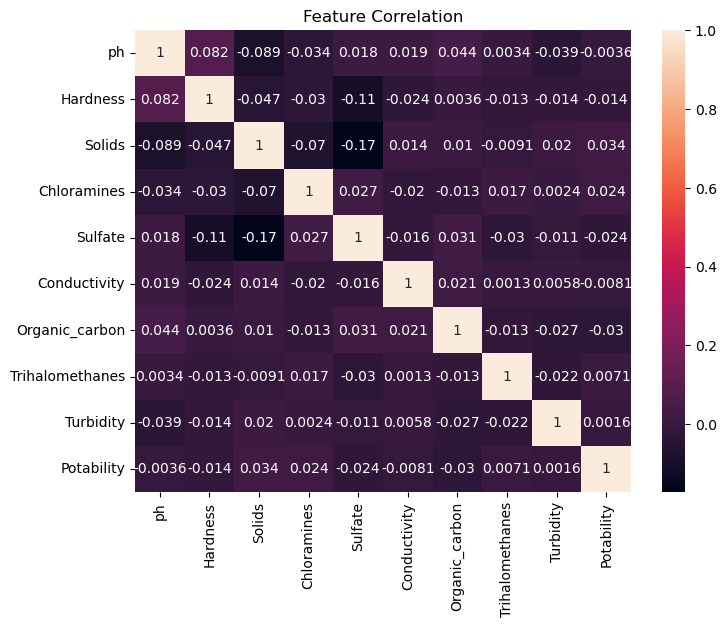

In [18]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
fig = sns.heatmap(water_df.corr(), annot=True)
plt.title('Feature Correlation')
plt.show()

### Missing values

In [19]:
print(water_df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


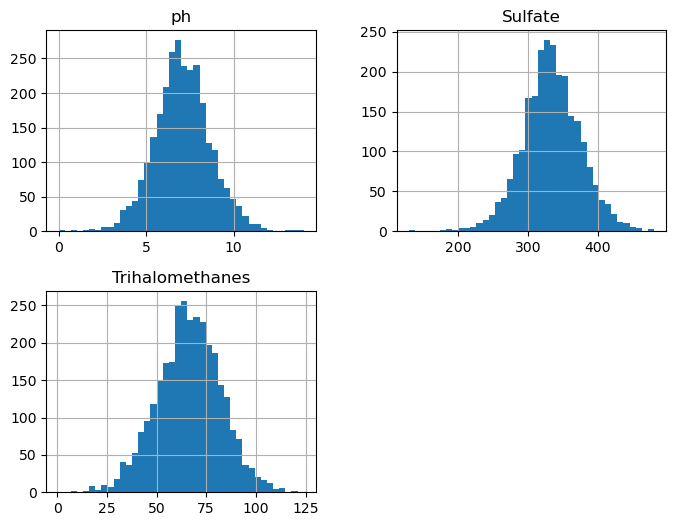

In [20]:
columns_miss = water_df[['ph', 'Sulfate', 'Trihalomethanes']]
columns_miss.hist(figsize=(8,6), bins=40)
#sns.histplot(columns_miss, bins=40, kde=True)
plt.title("Distribution of columns with missing values")
plt.show()

### Target variable balance

In [21]:
count_class = water_df["Potability"].value_counts() # counts the distribution of both values
print(count_class)
print()
percent_count =  water_df["Potability"].value_counts(normalize=True)
print("Potability distribution in %")
print(percent_count*100)

Potability
0    1998
1    1278
Name: count, dtype: int64

Potability distribution in %
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


## Data Preparation
To handle problem regarding missing values we did not drop rows with missing values because it would result in huge loss of information. We did not drop columns with missing values either, because it seems that all the columns are important and again it would lead to an unnecessary loss of information. To solve this problem, the missing values were imputed. We used two methods to do so: Simple Imputer and KNN Imputer, and later we will compare the model's performance with both imputations and choose the more accurate one. In the case of similar results, we will choose Simple Imputer for its speed and computational efficiency.

Because features have had very different ranges we scaled them using the Standard Scaler. After the data preparation we split the data (both dataframes with differently imputed missing values) where 30% will be used to test the model and 70% of the data will train it.

### Missing values

In [22]:
# making copies of the original dataset for 2 imputation methods
df_mean = water_df.copy()       # for Simple Imputer
df_knnimput = water_df.copy()   # for KNN Imputer

In [23]:
from sklearn.impute import SimpleImputer

# imputer uses "mean" strategy because values of features are quite symmetrically distributed (see histograms)
simple_imputer = SimpleImputer(strategy="mean")
df_mean[['ph', 'Sulfate', 'Trihalomethanes']] = simple_imputer.fit_transform(df_mean[['ph', 'Sulfate', 'Trihalomethanes']])
df_mean

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [24]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df_knnimput[['ph', 'Sulfate', 'Trihalomethanes']] = knn_imputer.fit_transform(df_knnimput[['ph', 'Sulfate', 'Trihalomethanes']])
df_knnimput

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.746642,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.506495,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,321.768097,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,322.003384,392.449580,19.903225,75.730786,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,308.680591,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,310.984723,402.883113,11.168946,77.488213,4.708658,1


### Scaling (normalization)


In [25]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = df_mean.columns.drop(['Potability'])

scaler = StandardScaler()
# for simple imputed dataset
df_mean[columns_to_scale] = scaler.fit_transform(df_mean[columns_to_scale])

In [26]:
# for KNN imputed dataset
columns_to_scale = df_knnimput.columns.drop(['Potability'])

df_knnimput[columns_to_scale] = scaler.fit_transform(df_knnimput[columns_to_scale])


### Data split (train/test) – with data imputed by Simple Imputer

In [27]:
X = df_mean.drop('Potability', axis=1)
y = df_mean['Potability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Modelling
Two models were made for water potability prediction:

1. KNN (K-Nearest Neighbors) – Chosen for its simplicity, easy implementation and ability to recognize patterns.
2. Random Forest – Selected after the poor performance of the KNN model. It is more complex and capable of handling high-dimensional data.

The KNN model was initially trained using both mean-imputed and KNN-imputed datasets. The KNN-imputed dataset performed slightly better, so it was used for further tuning. The model's accuracy score (63,4 %) was not good. To improve model's performance we used hyperparameter tuning to find the best value of parameter n_neighbors. We implemented a simple "for cycle" that built KNN models with n_neighbors ranging from 2 to 19. The optimal number of neighbors is 11. KNN Model that uses KKN imputed data and 11 neighbors has 65.9% accuracy. Adjusting the number of neighbors helped increase the accuracy by 3.2%. For Random Forest, we performed hyperparameter tuning using RandomizedSearchCV (GridSearch took too long to compute) with 5 fold cross-validation to find the combinations of following parameters: n_estimators, max_depth, min_samples_split, and min_samples_leaf. However, even after parameter tuning the model no longer showed any improvement in its performace.

### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[476, 141],
       [225, 141]], dtype=int64)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy score: ",accuracy)
print(class_report)

Accuracy score:  0.6276703967446592
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       617
           1       0.50      0.39      0.44       366

    accuracy                           0.63       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.61      0.63      0.62       983



#### For KNN imputed dataset

In [32]:
X = df_knnimput.drop('Potability', axis=1)
y = df_knnimput['Potability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [33]:
knn2 = KNeighborsClassifier(n_neighbors=5)

knn2.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn2.classes_)
cm

array([[479, 138],
       [221, 145]], dtype=int64)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy score: ",accuracy)
print(class_report)

Accuracy score:  0.6347914547304171
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       617
           1       0.51      0.40      0.45       366

    accuracy                           0.63       983
   macro avg       0.60      0.59      0.59       983
weighted avg       0.62      0.63      0.62       983



In [35]:
# Trying different numbers of neighbors.
neighbors_range = range(2,20)

best_k = None
best_accuracy = 0
results = []

for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))
    
    # best result
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k


print(f"Best value of k is: {best_k} with accuracy: {best_accuracy:.4f}")

Best value of k is: 11 with accuracy: 0.6592


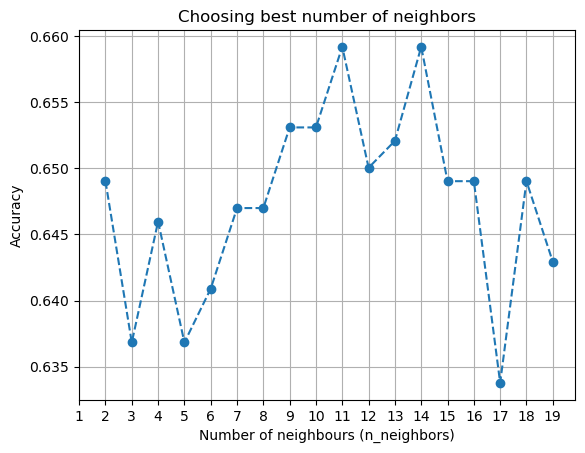

In [36]:
k_values, accuracies = zip(*results)
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel("Number of neighbours (n_neighbors)")
plt.ylabel("Accuracy")
plt.title("Choosing best number of neighbors")
plt.xticks(range(1, 20))
plt.grid()
plt.show()

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       617
           1       0.57      0.34      0.43       366

    accuracy                           0.66       983
   macro avg       0.63      0.60      0.59       983
weighted avg       0.64      0.66      0.64       983



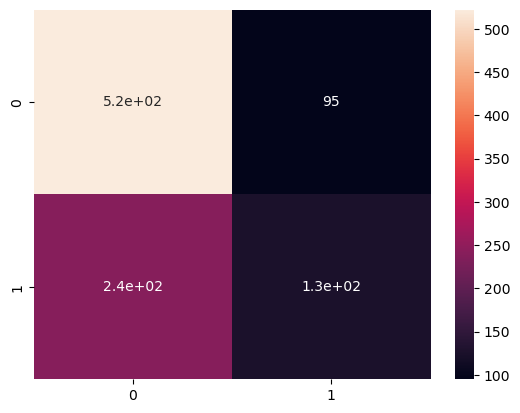

In [37]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = sns.heatmap(confusion_matrix(y_test, y_pred, labels=knn2.classes_), annot=True)
print(cm)

report = classification_report(y_test, y_pred)
print(report)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Random Forest Evaluation
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
cm

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       617
           1       0.67      0.34      0.45       366

    accuracy                           0.69       983
   macro avg       0.68      0.62      0.62       983
weighted avg       0.69      0.69      0.66       983



array([[555,  62],
       [240, 126]], dtype=int64)

#### Random Forest Tuning

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the model
rf = RandomForestClassifier()

# Define the hyperparameters and their values to be tested
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 186}
Best score:  0.6646364319624016


              precision    recall  f1-score   support

           0       0.69      0.91      0.79       617
           1       0.68      0.33      0.44       366

    accuracy                           0.69       983
   macro avg       0.69      0.62      0.61       983
weighted avg       0.69      0.69      0.66       983



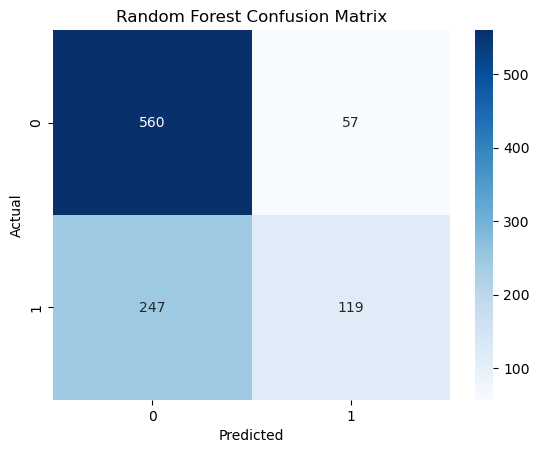

In [40]:
best_rf = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf, labels=best_rf.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

## Evaluation
To evaluate the models performance we used accuracy score, precision and recall. KNN (with optimal number of neighbors) improved accuracy to 65.9%, but Random Forest outperformed it at 69%. Simple baseline model that predicts the most frequent class has 61% accuracy. In comparison with that our models do not perform that much better and the accuracy is not high enough to consider our models successful.

The Random Forest Model is good at predicting non-potable water samples – correctly identifies 90% of actual non-potable water samples (recall). On the other hand, the model only identifies 34% of actual potable water samples, missing 66% of them. This might be explained by the imbalance of target variable – the model is biased toward non-potable water (class 0), leading to poor recall for potable water (class 1). 

Another reason for low accuracy score might be data quality issues – we had to impute many missing values which might have led to poor performance. 

## Deployment
Currently, our best-performing model (Random Forest) achieves 69% accuracy, which is better than the baseline (61%) but still not highly reliable for real-world decision-making. There are some issues that need to be addressed before deployment. There is a high risk of classifying safe water as unsafe. For further model development we suggest using more data from various data sources to improve model's performance.

## Conclusion
This project aimed to develop a machine learning model that would predict water potability. Throughout the process, we explored different data preprocessing techniques, tested multiple models, and evaluated their performance against a baseline. It was the first time we had to deal with that many missing values which taught us the importance of choosing the right imputation technique. At first our idea was to build only a KNN model but after we evaluated it we decided to make a different type of model and choose the better option. 

We also learned that data quality is crucial when making an ML model. Missing values and low feature correlations indicated that the dataset might not fully capture the factors influencing water potability. More data or better features could improve accuracy.

While 69% accuracy is an improvement, it’s not reliable enough for real-world use. Improving recall for potable water is essential to avoid unsafe water being classified as safe.

# Naive-Bayes - AI Detection

## Business Understanding

Artificial intelligence (AI) is a wide-ranging tool that enables people to rethink how we integrate information, analyze data, and use the resulting insights to improve decision making—and already it is transforming every walk of life. AI has become increasingly relevant in today’s world. Thus, it becomes important to evaluate the authenticity of the content generated. There are various AI Detection sites available on the internet which use different methods to do so. We have created a model that detects AI using “Naive Bayes”, and used a dataset from Kaggle to do so. 

The goal of this project was to create a simple model that was able to detect AI - generated text using techniques learned through the course "Introduction to Data Mining".

https://www.kaggle.com/datasets/sunilthite/llm-detect-ai-generated-text-dataset 

https://www.kaggle.com/datasets/carlmcbrideellis/llm-7-prompt-training-dataset


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset (replace with actual dataset)
ai = pd.read_csv("Training_Essay_Data.csv")  
ai.head()

ai_new = pd.read_csv("train_essays_7_prompts.csv")
ai_combined = pd.concat([ai, ai_new], ignore_index= True)


In [42]:
ai_combined.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


## Data Understanding

The dataset contains two columns: “text” and “generated”. Text includes more than 24000 essays written by students and AI generated texts. The “generated” column then labels the data as either human written (0) or AI generated (1). 

The data was collected from Kaggle.

We checked for any missing values and found none. Since the dataset is relatively simple, no exploratory statistics were performed.

We created a wordcloud to see the most important words for both human generated and ai-generated text.

We also checked the distribution of the target variable to ensure that the model would not be biased.

In [43]:
# Checking target variable distribution
print(ai_combined["generated"].value_counts())
prop_generated = ai_combined["generated"].value_counts(normalize=True)
print(prop_generated)

generated
0    13681
1    12802
Name: count, dtype: int64
generated
0    0.516596
1    0.483404
Name: proportion, dtype: float64


In [44]:
ai_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26483 entries, 0 to 26482
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       26483 non-null  object
 1   generated  26483 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 413.9+ KB


In [45]:
ai_combined.isnull().sum()

text         0
generated    0
dtype: int64

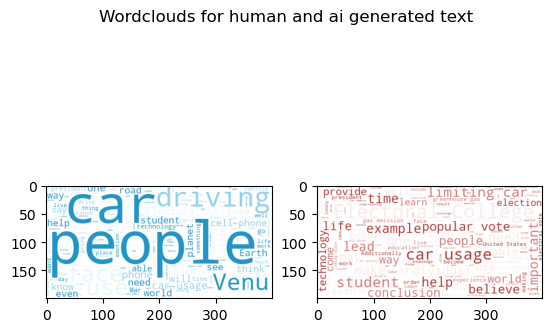

In [46]:
from wordcloud import WordCloud
from IPython.display import display, Markdown
from matplotlib import colors

# Generate a word cloud image]
humanText = ' '.join([Text for Text in ai_combined[ai_combined['generated']==0]['text']])
aiText = ' '.join([Text for Text in ai_combined[ai_combined['generated']==1]['text']])
colorListHam=['#e9f6fb','#92d2ed','#2195c5']
colorListSpam=['#f9ebeb','#d57676','#b03636']
colormapHam=colors.ListedColormap(colorListHam)
colormapSpam=colors.ListedColormap(colorListSpam)
wordcloudhuman = WordCloud(background_color='white', colormap=colormapHam).generate(humanText)
wordcloudai = WordCloud(background_color='white', colormap=colormapSpam).generate(aiText)

# Display the generated image:
# the matplotlib way:
fig, (wc1, wc2) = plt.subplots(1, 2)
fig.suptitle('Wordclouds for human and ai generated text')
wc1.imshow(wordcloudhuman)
wc2.imshow(wordcloudai)
plt.show()

## Data Preparation
Initially, the model was created with just 1 dataset. However, we then combined 2 datasets to make the model more accurate and expose it to different texts.

The 2 datasets did not contain a balanced distribution of the target variable and so we performed downsampling by deleting some rows of the majority class (human-generated text) in excel, which gave us a more balanced distribution.

The "text" column needed to be converted into numbers for the model to understand it. For this, we used the TFID Vectorizer which assigns a number to each word based on its importance. Eg: Words like "as","the" etc. occur often and hence have relatively low importance.

In [47]:
# Split into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(ai_combined["text"], ai_combined["generated"], test_size=0.3, random_state=42)

In [48]:
# Using vectorizer to assign values to words in the text
vectorizer = TfidfVectorizer(max_features=2000)  # Convert text into features
xTrain_tfidf = vectorizer.fit_transform(xTrain)
xTest_tfidf = vectorizer.transform(xTest)

## Modelling

We decided to create a Naive Bayes model since it is simple, fast and works well for classification. The data was divided in a 70/30% split and we used the default parameters. 

A drawback of Naive Bayes is that it assumes that all words are independent and does not consider the context in which they occur. This may affect its predictive power.

In [49]:
model = MultinomialNB()  # Create a Naïve Bayes model
model.fit(xTrain_tfidf, yTrain)  # Train the model


MultinomialNB()

## Evaluation

We evaluated the accuracy of the model using different metrics such as the accuracy score, confusion matrix and classification report. 

Our model performed 40% better thank the baseline (which would predict the most frequently occuring class and be accurate 51%)

We were able to achieve an accuracy of 96%.  

#### Performance on Class 0 (Human Generated Text):

Precision (0.96): When the model predicts "Human Generated Text" it is correct 96% of the time.

Recall (0.99): Out of all actual "Human Generated Texts", the model correctly identifies 98%.

#### Performance on Class 1 (AI-Generated Text):

Precision (0.98): When the model predicts "AI-Generated Text" it is correct 98% of the time.

Recall (0.91): Out of all actual "AI-Generated Texts", the model correctly identifies 91%.


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4092
           1       0.99      0.94      0.96      3853

    accuracy                           0.96      7945
   macro avg       0.97      0.96      0.96      7945
weighted avg       0.97      0.96      0.96      7945



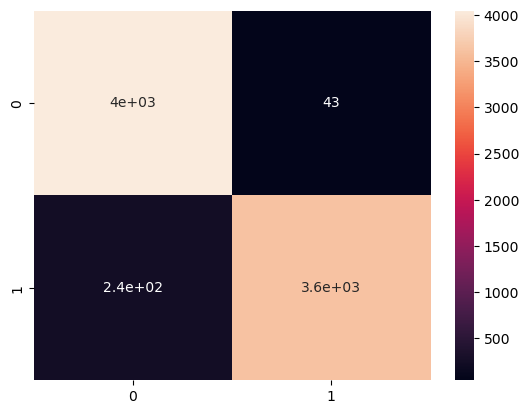

In [50]:
# Predict on test data
yPred = model.predict(xTest_tfidf)  

accuracy = accuracy_score(yTest, yPred)  
print(f"Accuracy: {accuracy:.2f}")  

cm1= confusion_matrix(yTest, yPred, labels= model.classes_)
report1 = classification_report(yTest, yPred)

sn.heatmap(cm1, annot=True)
print(report1)

## Deployment

We would deploy the model as a website, similar to other AI-detection methods. 

The model would be improved using user feedback as well as tracking performance over time. 

A challenge for the model would be the evolving patterns in AI-Generated text. To combat this, regular retraining of the model would be helpful.

In [51]:
# Detecting AI in user input
new_text = ["This research aims to explore new frontiers of artificial intelligence."]
new_text_tfidf = vectorizer.transform(new_text)

prediction = model.predict(new_text_tfidf)
print("AI-generated" if prediction[0] == 1 else "Human-written")


AI-generated


## Conclusion

This project focused on detecting AI-generated text using a Naïve Bayes classifier. Through the implementation process, we gained insights into how this model can identify patterns and anomalies in text data. Additionally, we explored the significance of maintaining a balanced dataset and applied techniques like downsampling to improve performance.  

While the model achieved strong accuracy, its limitations became evident—particularly its inability to consider context, which can result in misclassifications of human-written text. This highlights the need for continuous retraining and model updates to adapt to evolving AI-generated content.

# References

Bobbitt, Z. (2019, March 10). A Guide to Multicollinearity & VIF in Regression. Statology. https://www.statology.org/multicollinearity-regression/?utm_source 

Commission, E. (2025, March 5). Artificial Intelligence in healthcare. Public Health. https://health.ec.europa.eu/ehealth-digital-health-and-care/artificial-intelligence-healthcare_en

Fedesoriano. (2021). Heart Failure Prediction Dataset. kaggle.com. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data 

Government of Nova Scotia. (2009, April 1). Reducing or eliminating trihalomethanes (THMs) in drinking water | Drinking Water. Www.novascotia.ca. https://www.novascotia.ca/nse/water/thm.asp

US EPA. (2018, October 28). Chloramines in Drinking Water | US EPA. US EPA. https://www.epa.gov/dwreginfo/chloramines-drinking-water

US EPA. (2024, May 29). Indicators: Conductivity. US EPA. https://www.epa.gov/national-aquatic-resource-surveys/indicators-conductivity

Water Science School. (2019, October 22). pH and Water. USGS. https://www.usgs.gov/special-topics/water-science-school/science

